# Insurance Claim Classifier 

The data, FRAUD.csv, contains results of fraud investigations of 5,960 cases. The binary variable FRAUD indicates the result of a fraud investigation: 1 = Fraudulent, 0 = Otherwise. The other interval variables contain information about the cases.
1. TOTAL_SPEND: Total amount of claims in dollars
2. DOCTOR_VISITS: Number of visits to a doctor
3. NUM_CLAIMS: Number of claims made recently
4. MEMBER_DURATION: Membership duration in number of months
5. OPTOM_PRESC: Number of optical examinations
6. NUM_MEMBERS: Number of members covered

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.neighbors import NearestNeighbors as KNN

## 1. EDA

In [2]:
# Load the data
fraud_data = pd.read_csv('Fraud.csv')

In [4]:
# Inspect the data
fraud_data.head()

,CASE_ID,FRAUD,TOTAL_SPEND,DOCTOR_VISITS,NUM_CLAIMS,MEMBER_DURATION,OPTOM_PRESC,NUM_MEMBERS
0,1,1,1100,11,0,94,1,2
1,2,1,1300,7,2,122,0,1
2,3,1,1500,4,0,149,1,3
3,4,1,1500,9,0,180,1,1
4,5,0,1700,3,0,93,0,1


In [5]:
fraud_data.columns

Index(['CASE_ID', 'FRAUD', 'TOTAL_SPEND', 'DOCTOR_VISITS', 'NUM_CLAIMS',
       'MEMBER_DURATION', 'OPTOM_PRESC', 'NUM_MEMBERS'],
      dtype='object')

In [7]:
fraud_data[['TOTAL_SPEND', 'DOCTOR_VISITS', 'NUM_CLAIMS',\
          'MEMBER_DURATION', 'OPTOM_PRESC', 'NUM_MEMBERS']].describe()

,TOTAL_SPEND,DOCTOR_VISITS,NUM_CLAIMS,MEMBER_DURATION,OPTOM_PRESC,NUM_MEMBERS
count,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000
mean,18607.969799,8.941107,0.405705,179.615268,1.170134,1.985738
std,11207.480417,7.232345,1.079256,82.076572,1.653866,0.996873
min,1100.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,11100.000000,3.000000,0.000000,117.000000,0.000000,1.000000
50%,16300.000000,8.000000,0.000000,178.000000,1.000000,2.000000
75%,23300.000000,12.000000,0.000000,227.000000,2.000000,3.000000
max,89900.000000,41.000000,15.000000,660.000000,17.000000,8.000000


In [8]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 8 columns):
CASE_ID            5960 non-null int64
FRAUD              5960 non-null int64
TOTAL_SPEND        5960 non-null int64
DOCTOR_VISITS      5960 non-null int64
NUM_CLAIMS         5960 non-null int64
MEMBER_DURATION    5960 non-null int64
OPTOM_PRESC        5960 non-null int64
NUM_MEMBERS        5960 non-null int64
dtypes: int64(8)
memory usage: 372.6 KB


### Percent of investigations are found to be fraudulent

In [10]:
n_entries = len(fraud_data)
print("Total number of entries:", n_entries)
n_fraud = np.sum(fraud_data['FRAUD'].values)
print("Total number of FRAUD entries:", n_fraud)
fraud_percent = np.around(np.around((n_fraud / n_entries), decimals=4) * 100, decimals=2)
print("Percent of investigations are found to be fraudulent: " + str(fraud_percent) + "%")

Total number of entries: 5960
Total number of FRAUD entries: 1189
Percent of investigations are found to be fraudulent: 19.95%


### Visualize the distribution of the features

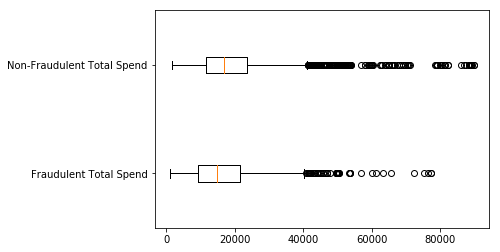

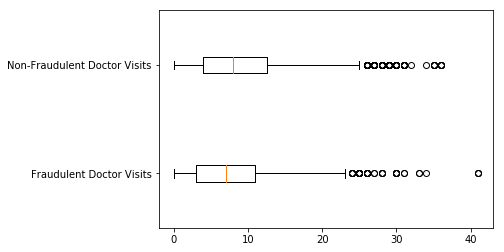

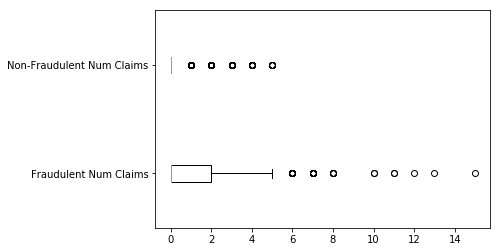

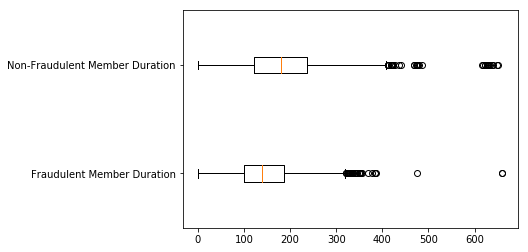

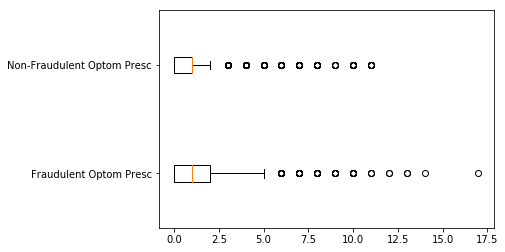

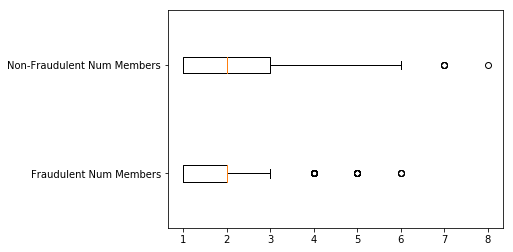

In [12]:
fraudulent_obs = fraud_data[fraud_data['FRAUD']==1]
fraudulent_obs = fraudulent_obs[['TOTAL_SPEND', 'DOCTOR_VISITS', 'NUM_CLAIMS',\
                                 'MEMBER_DURATION', 'OPTOM_PRESC', 'NUM_MEMBERS']]

non_fraudulent_obs = fraud_data[fraud_data['FRAUD']==0]
non_fraudulent_obs = non_fraudulent_obs[['TOTAL_SPEND', 'DOCTOR_VISITS', 'NUM_CLAIMS',\
                                 'MEMBER_DURATION', 'OPTOM_PRESC', 'NUM_MEMBERS']]
# Total spend
plt.figure()
plt.boxplot([fraudulent_obs['TOTAL_SPEND'], non_fraudulent_obs['TOTAL_SPEND']],\
            labels=['Fraudulent Total Spend', 'Non-Fraudulent Total Spend'], vert=False)
plt.show()

# Doctor visits
plt.figure()
plt.boxplot([fraudulent_obs['DOCTOR_VISITS'], non_fraudulent_obs['DOCTOR_VISITS']],\
            labels=['Fraudulent Doctor Visits', 'Non-Fraudulent Doctor Visits'], vert=False)
plt.show()

# Num claims
plt.figure()
plt.boxplot([fraudulent_obs['NUM_CLAIMS'], non_fraudulent_obs['NUM_CLAIMS']],\
            labels=['Fraudulent Num Claims', 'Non-Fraudulent Num Claims'], vert=False)
plt.show()

# Member duration
plt.figure()
plt.boxplot([fraudulent_obs['MEMBER_DURATION'], non_fraudulent_obs['MEMBER_DURATION']],\
            labels=['Fraudulent Member Duration', 'Non-Fraudulent Member Duration'], vert=False)
plt.show()

# Optom presc
plt.figure()
plt.boxplot([fraudulent_obs['OPTOM_PRESC'], non_fraudulent_obs['OPTOM_PRESC']],\
            labels=['Fraudulent Optom Presc', 'Non-Fraudulent Optom Presc'], vert=False)
plt.show()

# Num Members
plt.figure()
plt.boxplot([fraudulent_obs['NUM_MEMBERS'], non_fraudulent_obs['NUM_MEMBERS']],\
            labels=['Fraudulent Num Members', 'Non-Fraudulent Num Members'], vert=False)
plt.show()

### Normalize the feature values

In [13]:
# Orthonormalized the fraud data
x = np.matrix(fraud_data[['TOTAL_SPEND', 'DOCTOR_VISITS', 'NUM_CLAIMS',\
                                 'MEMBER_DURATION', 'OPTOM_PRESC', 'NUM_MEMBERS']].values)

xtx = x.transpose() * x
print("t(x) * x = \n", xtx)

# Eigenvalue decompostion
evals, evecs = np.linalg.eigh(xtx)
print("Eigenvalues of x = \n", evals)
print("Eigenvectors of x = \n",evecs)

# Create transformation matrix
transf = evecs * np.linalg.inv(np.sqrt(np.diagflat(evals)));
print("Transformation Matrix = \n", transf)

# Transform x
transf_x = x * transf;
print("The Transformed x = \n", transf_x)

# # Check columns of transformed X
xtx = transf_x.transpose() * transf_x;
print("Expect an Identity Matrix = \n", xtx)

t(x) * x = 
 [[2812184770000    1040176400      42913200   20404919400     134771800
      220035900]
 [   1040176400        788159         23809      10264845         57654
         106717]
 [     42913200         23809          7922        448090          3459
           4765]
 [  20404919400      10264845        448090     232422585       1163391
        2121127]
 [    134771800         57654          3459       1163391         24460
          13581]
 [    220035900        106717          4765       2121127         13581
          29423]]
Eigenvalues of x = 
 [6.84728061e+03 8.38798104e+03 1.80639631e+04 3.15839942e+05
 8.44539131e+07 2.81233324e+12]
Eigenvectors of x = 
 [[-5.37750046e-06 -2.20900379e-05  3.62806809e-05 -1.36298664e-04
  -7.26453432e-03  9.99973603e-01]
 [ 6.05433402e-03 -2.69942162e-02  1.27528313e-02  9.99013423e-01
   3.23120126e-02  3.69879256e-04]
 [-9.82198935e-01  1.56454700e-01 -1.03312781e-01  1.14463687e-02
   1.62110700e-03  1.52596881e-05]
 [ 1.59310591

## 2. Build NearestNeightbors Model

In [14]:
# Perform classification
# Create classifier with 5 neighbors
classifier = KNC(n_neighbors=5, algorithm='brute', metric='euclidean')

# Train the classifier with training data
training_data = transf_x
training_labels = fraud_data['FRAUD'].values
classifier.fit(training_data, training_labels)

# Check the accuracy rate of the classifier
accuracy = classifier.score(training_data, training_labels)
print("Score function return value:", accuracy)

Score function return value: 0.8778523489932886


In [16]:
# Specify the KNN with 5 neighbors
KNN_spec = KNN(n_neighbors=5, algorithm='brute', metric='euclidean')

# Build nearest neighbors
nbrs = KNN_spec.fit(training_data)
distances, indices = nbrs.kneighbors(training_data)
print(distances[:10])
print(indices[:10])

[[3.29272254e-10 4.73407530e-03 6.72294710e-03 6.89870062e-03
  7.31938571e-03]
 [0.00000000e+00 7.94183172e-03 8.25051208e-03 8.33596239e-03
  9.54723636e-03]
 [0.00000000e+00 4.05430137e-03 4.66635557e-03 4.97042629e-03
  5.48104224e-03]
 [0.00000000e+00 1.73400564e-03 2.64662370e-03 3.79313734e-03
  3.97648598e-03]
 [1.64636127e-10 1.77032773e-03 3.32439937e-03 3.35564142e-03
  3.60190256e-03]
 [0.00000000e+00 6.27912630e-03 6.70339690e-03 7.51114093e-03
  7.90636035e-03]
 [0.00000000e+00 6.39474893e-03 9.85816223e-03 1.00983870e-02
  1.19172153e-02]
 [0.00000000e+00 3.81874354e-03 4.93172015e-03 5.34980015e-03
  5.67172859e-03]
 [0.00000000e+00 1.03741167e-02 1.09904683e-02 1.14805969e-02
  1.19256921e-02]
 [0.00000000e+00 7.09740805e-03 7.20565058e-03 7.24282152e-03
  7.35385314e-03]]
[[   0   25  149  322  582]
 [   1  773 1161  184   66]
 [   2  171   70  380  437]
 [   3   51   63  159  186]
 [   4   26  117  153   62]
 [   5   85  673 1172 1621]
 [   6  327  100 1075 1176]
 [ 

## 3. Predict the class of the focal data

In [17]:
# Find the nearest neighbors of this focal observation
focal = [[7500, 15, 3, 127, 2, 2]]
# Tansform the focal
transf_focal = focal * transf
print("Transformed input variable values:", transf_focal)

my_neighbors_t = nbrs.kneighbors(transf_focal, return_distance=False)
print("My Neighbors = \n", my_neighbors_t)

print(fraud_data.iloc[588, :])
print(fraud_data.iloc[2897, :])
print(fraud_data.iloc[1199, :])
print(fraud_data.iloc[1246, :])
print(fraud_data.iloc[886, :])

# Predict the outcome of the focol
prediction = classifier.predict(transf_focal)

Transformed input variable values: [[-0.02886529  0.00853837 -0.01333491  0.0176811   0.00793805  0.0044727 ]]
My Neighbors = 
 [[ 588 2897 1199 1246  886]]
CASE_ID             589
FRAUD                 1
TOTAL_SPEND        7500
DOCTOR_VISITS        15
NUM_CLAIMS            3
MEMBER_DURATION     127
OPTOM_PRESC           2
NUM_MEMBERS           2
Name: 588, dtype: int64
CASE_ID             2898
FRAUD                  1
TOTAL_SPEND        16000
DOCTOR_VISITS         18
NUM_CLAIMS             3
MEMBER_DURATION      146
OPTOM_PRESC            3
NUM_MEMBERS            2
Name: 2897, dtype: int64
CASE_ID             1200
FRAUD                  1
TOTAL_SPEND        10000
DOCTOR_VISITS         16
NUM_CLAIMS             3
MEMBER_DURATION      124
OPTOM_PRESC            2
NUM_MEMBERS            1
Name: 1199, dtype: int64
CASE_ID             1247
FRAUD                  1
TOTAL_SPEND        10200
DOCTOR_VISITS         13
NUM_CLAIMS             3
MEMBER_DURATION      119
OPTOM_PRESC            2
NU

The predicted probability of fraudulent is 1 because 5 out of the 5 nearest neighbors are fraudulent. Therefore, the observation is fraudulent. The predicted value of this observation is 1 which matches the predicted probability of fraudulent, so the observation is not misclassified